Importing required modules

In [1]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import tensorflow as tf
import keras.backend as K
import tensorflow_addons as tfa

In [4]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
## changing current directory to a images folder in drive 

root_dir = "/content/drive/MyDrive/Part 3/"
os.chdir(root_dir)

In [6]:
## list of the 6 folders of training images 
cwd = os.getcwd()
train_folders_path =  os.path.join(cwd, 'Train/TI/')
test_folders_path = os.path.join(cwd, 'Test/untitled folder/')


In [7]:
train_folders = sorted(os.path.join(cwd, 'Train/TI/', f'{folder}/') for folder in os.listdir(train_folders_path))
train_folders

['/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 1/',
 '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 2/',
 '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 3/',
 '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 4/',
 '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 5/',
 '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 6/']

In [8]:
test_folders = sorted(os.path.join(cwd, 'Test/untitled folder/', f'{folder}/') for folder in (os.listdir(test_folders_path)))[1:]
test_folders

['/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Test/untitled folder/test images 1/',
 '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Test/untitled folder/test images 2/']

In [ ]:
# ## number of images in each train folder 
# for folder in train_folders:
#   print(len(os.listdir(f'./Train/TI/{folder}/')))

Importing ship details from CSV file

In [9]:
ship_df = pd.read_csv('train_df.csv', index_col='Unnamed: 0')
ship_df.head()

ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  0001b1832.jpg                                                NaN
4  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...

In [ ]:
len(ship_df), len(ship_df['ImageId'].unique())

(194608, 161747)

In [ ]:
## understanding image shape 

#choosing a random image in train images folder
image_name = (os.listdir(f'./Train/TI/train images 1/'))[5]      ## image from train image 1 folder 
image_path = os.path.join(f'./Train/TI/train images 1/', image_name)    ## path of image

# getting image shape
image = Image.open(image_path)
img_shape = np.array(image).shape

print(f"Image path: {image_path} \nImage shape: {img_shape}")

Image path: ./Train/TI/train images 1/901764fa6.jpg 
Image shape: (768, 768, 3)


The height and width of images are 768 x 768.
We can recogonize the ships by masking the entire image and only finding the location of these encoded pixels. 

In [10]:
number_ships = ship_df.groupby('ImageId').apply(lambda df:df['EncodedPixels'].count())
number_ships = number_ships.reset_index(name='Number_of_ships')

In [ ]:
## list of zero, one and two ships
zero_ship = number_ships[number_ships['Number_of_ships']==0]['ImageId'].tolist()
one_ship = number_ships[number_ships['Number_of_ships']==1]['ImageId'].tolist()
two_ships = number_ships[number_ships['Number_of_ships']==2]['ImageId'].tolist()

**6) Plotting images with 0, 1 and 2 ships**

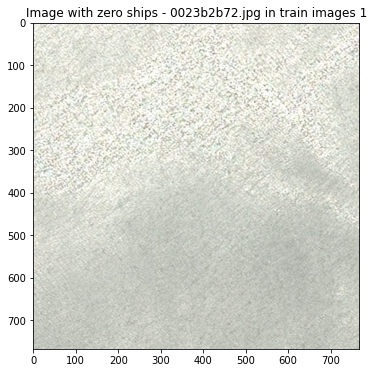

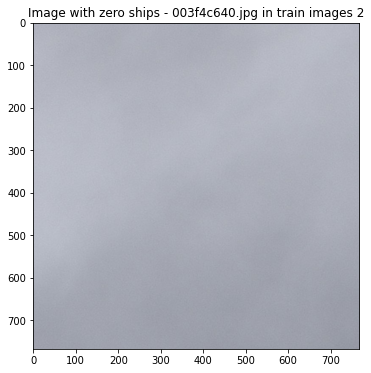

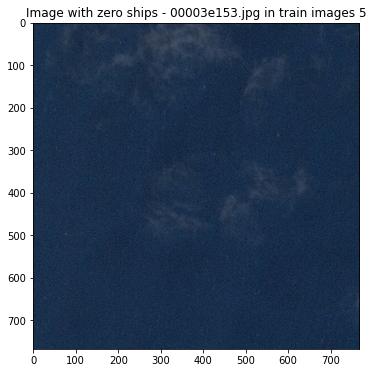

In [ ]:
### find 3 images of 0 ships from train folders

for folder in train_folders:
  for i in range(0,150,60):
    if zero_ship[i] in (os.listdir(folder)):
       image = mpimg.imread(f'{folder}/{zero_ship[i]}')
       plt.figure(figsize=(6,6))
       plt.imshow(image)
       plt.title(f'Image with zero ships - {zero_ship[i]} in {folder[-15:-1]}')
       plt.show()
    

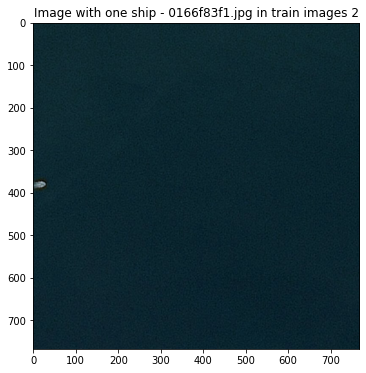

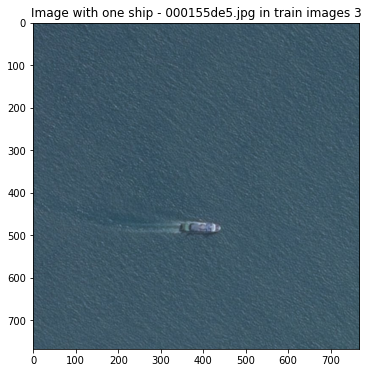

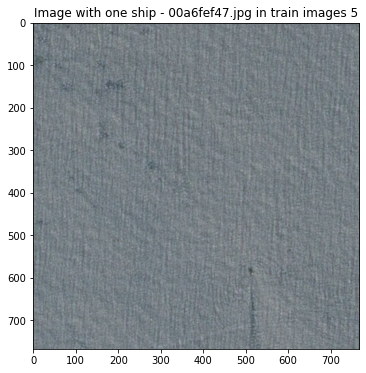

In [ ]:
### find 3 images of 1 ship from train folders

for folder in train_folders:
  for i in range(0,150,60):
    if one_ship[i] in (os.listdir(folder)):
       image = mpimg.imread(f'{folder}/{one_ship[i]}')
       plt.figure(figsize=(6,6))
       plt.imshow(image)
       plt.title(f'Image with one ship - {one_ship[i]} in {folder[-15:-1]}')
       plt.show()

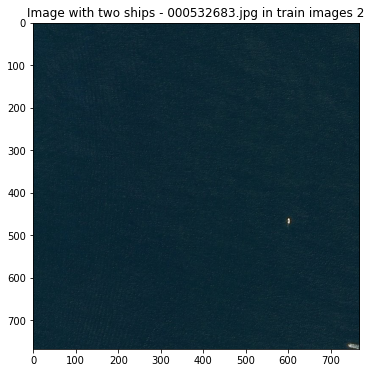

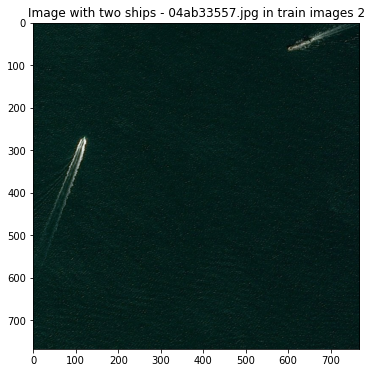

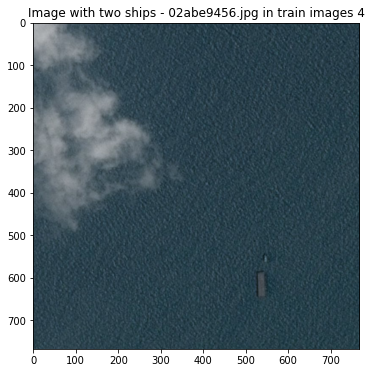

In [ ]:
### find 3 images of 2 ships from train folders

for folder in train_folders:
  for i in range(0,150,60):
    if two_ships[i] in (os.listdir(folder)):
       image = mpimg.imread(f'{folder}/{two_ships[i]}')
       plt.figure(figsize=(6,6))
       plt.imshow(image)
       plt.title(f'Image with two ships - {two_ships[i]} in {folder[-15:-1]}')
       plt.show()

**7) Highling the ships in above images**

- the images having zero ships are bit considered for this

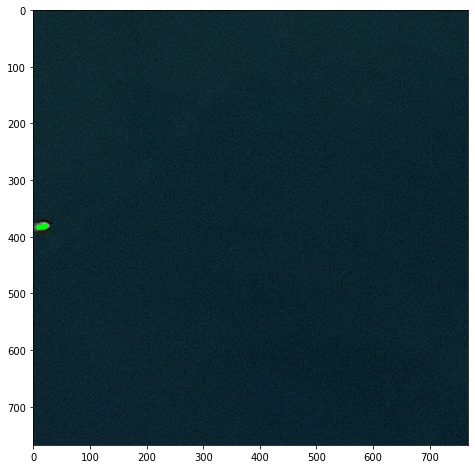

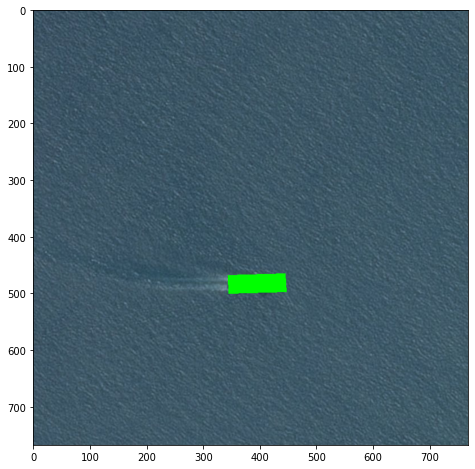

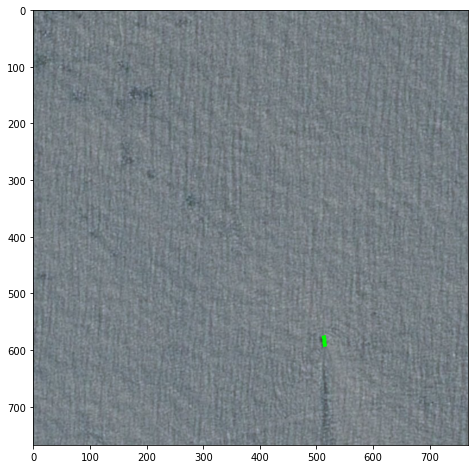

In [ ]:
## images with 1 ship 

for folder in train_folders:
  for i in range(0,150,60):
    if one_ship[i] in (os.listdir(folder)):
      encoded_pixel_list = list(ship_df[ship_df['ImageId']==one_ship[i]]['EncodedPixels'])
      mask = np.zeros((768,768))
      for pixels in encoded_pixel_list:
        segment = pixels.split()
        for j in range(0,len(segment),2):   ## due to the encoding pixels format (RLE)
          start = int(segment[j]) - 1
          length = int(segment[j+1])
          mask[(start % 768):(start % 768 + length), (start // 768)] = 1
      
      image = Image.open(f'{folder}{one_ship[i]}')
      image= np.array(image)
      image[mask==1] = [0,255,0]     ## highlighting the areas with ship
      plt.figure(figsize=(8,8))
      plt.imshow(image)
      plt.show()
  


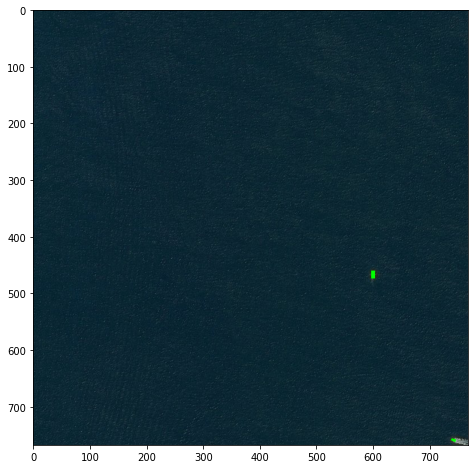

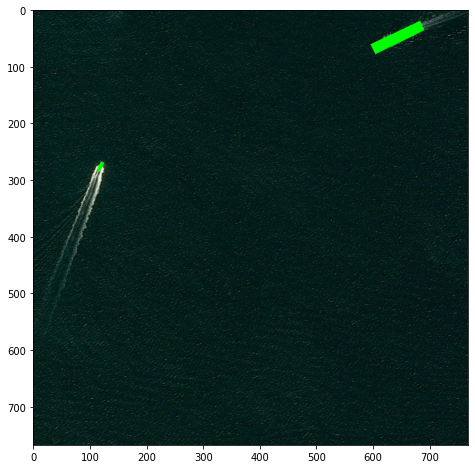

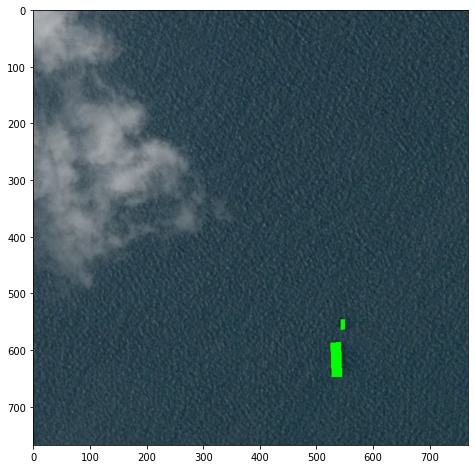

In [ ]:
## images with 2 ships 

for folder in train_folders:
  for i in range(0,150,60):    
    if two_ships[i] in (os.listdir(folder)):
      encoded_pixel_list = list(ship_df[ship_df['ImageId']==two_ships[i]]['EncodedPixels'])
      mask = np.zeros((768,768))
      for pixels in encoded_pixel_list:
        segment = pixels.split()
        for j in range(0,len(segment),2):   ## due to the encoding pixels format (RLE)
          start = int(segment[j]) - 1
          length = int(segment[j+1])
          mask[(start % 768):(start % 768 + length), (start // 768)] = 1
      
      image = Image.open(f'{folder}{two_ships[i]}')
      image= np.array(image)
      image[mask==1] = [0,255,0]     ## highlighting the areas with ship
      plt.figure(figsize=(8,8))
      plt.imshow(image)
      plt.show()




**8) Plotting random test images**

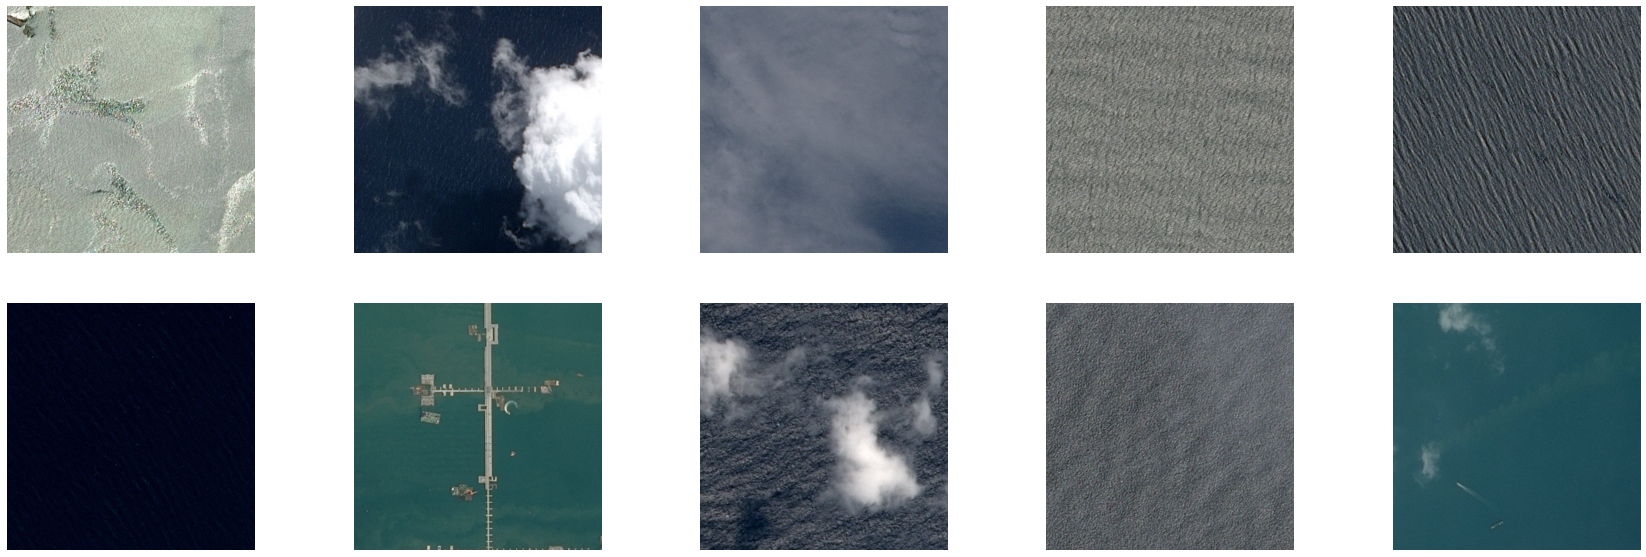

In [ ]:
# Get a list of all image files in the two test folders
image_files = [os.path.join(test_folders[0], f'{image_name}') for image_name in os.listdir(test_folders[0])] + [os.path.join(test_folders[1], f'{image_name}') for image_name in os.listdir(test_folders[1])]

# Choose the number of images to display
num_images = 10

# Create a plot with random images from the two folders
fig, axs = plt.subplots(nrows=2, ncols=5,figsize=(30,10))
for i in range(num_images):
    # Choose a random image file from the list
    image_path = random.choice(image_files)
    
    # Open the image file and plot the image
    image = Image.open(image_path)
    axs[i//5][i%5].imshow(image)
    axs[i//5][i%5].axis('off')

# Show the plot
plt.show()

**9) Performing Object detection**

In [10]:
## creating a dataset that has enocded pixels of one image together

image_pixels = ship_df.groupby(by=['ImageId'])['EncodedPixels'].apply(lambda x: np.nan if pd.isna(x).any() else ' '.join(x)).reset_index()
image_pixels.head()

ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  0001b1832.jpg                                                NaN
4  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...

In [11]:
## one image is blank - 6384c3e78.jpg - removing this from ship_df and will remove from train set
train_df = image_pixels.drop(image_pixels[image_pixels['ImageId']=='6384c3e78.jpg'].index)
train_df.head()

ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  0001b1832.jpg                                                NaN
4  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...

In [13]:
## understanding our training data - amount of images for each ship number category

number_ships.groupby('Number_of_ships')['ImageId'].count()

Number_of_ships
0     125935
1      22802
2       6490
3       2477
4       1359
5        778
6        554
7        342
8        264
9        207
10       132
11       128
12        96
13        62
14        60
15        61
Name: ImageId, dtype: int64

As seen, the number of images without any ship is more, thus making the training set a little biased. Thus reducing the number of images with no ships. 

In [12]:
No_ships = 50000
## taking only 50000 images with no ship (setting in training csv)

no_ships_df = train_df[train_df['EncodedPixels'].isna()]
has_ships_df = train_df[train_df['EncodedPixels'].notna()]

## creating a reduced train set
reduced_train_df = pd.concat([no_ships_df[:No_ships],has_ships_df], axis=0)
reduced_train_df

ImageId                                      EncodedPixels
0       00003e153.jpg                                                NaN
1       0001124c7.jpg                                                NaN
3       0001b1832.jpg                                                NaN
5       0002d0f32.jpg                                                NaN
6       000303d4d.jpg                                                NaN
...               ...                                                ...
161717  fff67c31a.jpg  119970 1 120737 3 121503 6 122270 8 123037 10 ...
161722  fff909871.jpg  441057 2 441825 4 442592 7 443360 9 444128 11 ...
161735  fffcb6464.jpg  222782 4 223550 10 224318 14 225086 14 225854 ...
161738  fffd924fb.jpg  110011 5 110779 5 111547 5 112315 5 113083 5 1...
161739  fffdd2377.jpg  333603 7 334359 19 335120 26 335888 26 336656 ...

[85812 rows x 2 columns]

In [13]:
image_shape = (256,256)
num_classes = 2

In [14]:
## defining function to convert the encoded pixels (RLE) to mask 

def rle_to_mask(encoded_pixel: str, shape=(768,768)):
  mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
  segment = np.array(encoded_pixel.split(), dtype=int)
  start = segment[::2] - 1
  end = start + segment[1::2]
  for low, high in zip(start,end):
    mask[low:high] = 1
  return mask.reshape(shape).T


## defining function to convert mask to RLE(encoded pixels)
def mask_to_rle(masked_image, shape=(768,768)):
  image = masked_image.astype('float32')
  image = cv2.resize(image, shape, interpolation=cv2.INTER_AREA)
  image = np.stack(np.vectorize(lambda x: 1 if x >= 0.1 else 0)(image), axis=1)
  pixels = image.T.flatten()
  pixels = np.concatenate([[0], pixels, [0]])
  runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
  runs[1::2] -= runs[::2]
  return ' '.join(str(x) for x in runs)


In [15]:
train_images_list = reduced_train_df['ImageId'].tolist()
len(train_images_list)

85812

In [16]:
## defining functions to load data for training/ validation

def one_hot_encode(array, n_classes):
    return np.squeeze(np.eye(n_classes)[array])

def load_train_image(tensor):
    image_path = tf.get_static_value(tensor).decode("utf-8")

    image_name = image_path.split('/')[-1]
    input_image = cv2.imread(image_path)
    input_image = tf.image.resize(input_image, image_shape)
    input_image = tf.cast(input_image, tf.float32) / 255.0

    encoded_mask = reduced_train_df[reduced_train_df['ImageId'] == image_name].iloc[0]['EncodedPixels']
    input_mask = np.zeros(image_shape + (1,), dtype=np.int8)
    if not pd.isna(encoded_mask):
        input_mask = rle_to_mask(encoded_mask)
        input_mask = cv2.resize(input_mask, image_shape, interpolation=cv2.INTER_AREA)
        input_mask = np.expand_dims(input_mask, axis=2)
    one_hot_segmentation_mask = one_hot_encode(input_mask, num_classes)
    input_mask_tensor = tf.convert_to_tensor(one_hot_segmentation_mask, dtype=tf.float32)
    
    class_weights = tf.constant([0.0005, 0.9995], tf.float32)
    sample_weights = tf.gather(class_weights, indices=tf.cast(input_mask_tensor, tf.int32), name='cast_sample_weights')

    return input_image, input_mask_tensor, sample_weights

In [19]:
# getting path of each image

images_path = []

for folder in train_folders:
  for imageid in os.listdir(folder):
    if imageid in train_images_list: 
      images_path.append(os.path.join(folder,imageid))

images_path[:5], len(images_path)

(['/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 1/dfd602788.jpg',
  '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 1/43a2db1e1.jpg',
  '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 1/5195d0087.jpg',
  '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 1/cfe74508f.jpg',
  '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Train/TI/train images 1/12a205ef8.jpg'],
 85812)

In [20]:
train_images_ds = tf.data.Dataset.list_files(images_path, shuffle=True)

In [21]:
train_val_images = train_images_ds.map(lambda x: tf.py_function(load_train_image, [x], [tf.float32, tf.float32]), num_parallel_calls=tf.data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [22]:
VAL_SIZE = int(0.2 * len(train_images_list))
TRAIN_SIZE = len(train_images_list) - int(0.2 * len(train_images_list))

In [23]:
val_set = train_val_images.take(VAL_SIZE)
train_set = train_val_images.take(TRAIN_SIZE)


len(train_set), len(val_set), len(train_images_list)
# type(train_set), type(val_set)

(68650, 17162, 85812)

In [24]:
n_batches = 32

batches_train = (train_set.repeat().batch(n_batches))
batches_val = val_set.batch(n_batches)

# type(batches_train), type(batches_val)

## Our Model for Object Detection

Defining functions for our model 

In [25]:
## function for down sampling     
def convolution_blocks(filters, size, apply_batch_norm=False, apply_instance_norm=False, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  layer = tf.keras.Sequential()
  layer.add(tf.keras.layers.Conv2D(filters, size, strides=1,
                                 padding='same', use_bias=False,
                                 kernel_initializer=initializer,))
  if apply_batch_norm:
    layer.add(tf.keras.layers.BatchNormalization())
  if apply_instance_norm:
    layer.add(tfa.layers.InstanceNormalization())
    layer.add(tf.keras.layers.Activation(tfa.activations.mish))
  if apply_dropout:
    layer.add(tf.keras.layers.Dropout(0.55))
  return layer

In [26]:
## function for upsampling 
def upsample_block(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  layer = tf.keras.Sequential()
  layer.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                          padding='same',
                                          kernel_initializer=initializer,
                                          use_bias=False))
  layer.add(tf.keras.layers.BatchNormalization())
  if apply_dropout:
    layer.add(tf.keras.layers.Dropout(0.1))
    layer.add(tf.keras.layers.Activation(tfa.activations.mish))
  return layer

In [27]:
## function for encoder 
    
def encoder(input_shape, filters_list):
  input_layer = tf.keras.layers.Input(shape=input_shape)
  output = []
  model = tf.keras.Sequential()
  layer = model(input_layer)
  for filters in filters_list:
    layer = convolution_blocks(filters=filters, size=3, apply_instance_norm=True)(layer)
    layer = convolution_blocks(filters=filters, size=1, apply_instance_norm=True)(layer)
    output.append(layer)
    layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(layer)
  output_layer = convolution_blocks(filters=128, size=3, apply_batch_norm=True, apply_dropout=False)(layer)
  output.append(output_layer)

  # Create the feature extraction model
  encoder = tf.keras.Model(inputs=input_layer, outputs=output, name="encoder")
  encoder.trainable = True
  return encoder


In [28]:
## function for decoder  
   
def decoder(encoder_outputs, filters_list):     
  enc_list = encoder_outputs[-1]
  for filters, skip, apply_dropout in zip(filters_list, encoder_outputs[-2::-1], [False] * 4):
    enc_list = upsample_block(filters, 3)(enc_list)
    enc_list = tf.keras.layers.Concatenate()([enc_list, skip])
    enc_list = convolution_blocks(filters, size=3, apply_batch_norm=True, apply_dropout=apply_dropout)(enc_list)
    decoder_output = convolution_blocks(filters, size=1, apply_batch_norm=True)(enc_list)
  return decoder_output

In [29]:
## building model function
def UNet_model(input_shape=(128, 128, 3), num_classes=num_classes):
  input_layer = tf.keras.layers.Input(shape=input_shape)
  
  filters_list = [16, 32, 64]
  
  # Encoder
  encoder_outputs = encoder(input_shape, filters_list)(input_layer)
  print(f'Encoder output tensors: {encoder_outputs}')
  
  # Decoder 
  decoder_output = decoder(encoder_outputs, filters_list[::-1])

  # last layers of the model
  last_layer = convolution_blocks(num_classes, size=1)(decoder_output)
  outputs = tf.keras.activations.softmax(last_layer)
  
  return tf.keras.Model(inputs=input_layer, outputs=outputs)

In [31]:
## defining a class for IOU metric

class IoU(tf.keras.metrics.Metric):
    def __init__(self, n_classes: int, target_class_ids: list, sparse_y_true: bool, sparse_y_pred: bool,axis: int = -1, name=None, dtype=None):
        super(IoU, self).__init__(name=name, dtype=dtype)
        self.num_classes = n_classes
        self.target_class_ids = target_class_ids
        self.sparse_y_true = sparse_y_true
        self.sparse_y_pred = sparse_y_pred
        self.axis = axis

        # getting predictions in the confusion matrix.
        self.total_cm = self.add_weight(
            'tot_confusion_matrix',
            shape=(n_classes, n_classes),initializer='zeros')

    ## gets the values for confusion matrix
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(y_true, [-1] + list(y_pred.shape[1:]))
        
        if not self.sparse_y_true:
            y_true = tf.argmax(y_true, axis=self.axis)
        if not self.sparse_y_pred:
            y_pred = tf.argmax(y_pred, axis=self.axis)
            
        y_true = tf.cast(y_true, self._dtype)
        y_pred = tf.cast(y_pred, self._dtype)

        # Flatten input if its dim > 1.
        if y_pred.shape.ndims > 1:
            y_pred = tf.reshape(y_pred, [-1])

        if y_true.shape.ndims > 1:
            y_true = tf.reshape(y_true, [-1])

        if sample_weight is not None:
            sample_weight = tf.reshape(sample_weight, [-1, 128, 128])
            sample_weight = tf.cast(sample_weight, self._dtype)
            if sample_weight.shape.ndims > 1:
                sample_weight = tf.reshape(sample_weight, [-1])

        # Accumulate prediction to current confusion matrix.
        current_cm = tf.math.confusion_matrix(y_true, y_pred, self.num_classes, weights=sample_weight, dtype=self._dtype)
        return self.total_cm.assign_add(current_cm)
    

    ## reseting 
    def reset_state(self):
        tf.keras.backend.set_value(
            self.total_cm, np.zeros((self.num_classes, self.num_classes))
        )
    

    ## computes the IOU using the confusion matrix
    ## IOU = true_positives / (true_positives + false_positives + false_negatives)
    def result(self):
        add_over_row = tf.cast(
            tf.reduce_sum(self.total_cm, axis=0), dtype=self._dtype)
        add_over_col = tf.cast(
            tf.reduce_sum(self.total_cm, axis=1), dtype=self._dtype)
        TP = tf.cast(
            tf.linalg.tensor_diag_part(self.total_cm), dtype=self._dtype)   ## True positives

        # add_over_row + add_over_col = 2 * true_positives + false_positives + false_negatives.
        denominator = add_over_row + add_over_col - TP

        # Only keeping target classes
        TP = tf.gather(TP, self.target_class_ids)
        denominator = tf.gather(denominator, self.target_class_ids)

        # If denominator = 0, ignore class.
        num_valid_entries = tf.reduce_sum(
            tf.cast(tf.not_equal(denominator, 0), dtype=self._dtype))

        iou = tf.math.divide_no_nan(TP, denominator)

        return tf.math.divide_no_nan(
            tf.reduce_sum(iou, name='mean_iou'), num_valid_entries)
    
    def get_config(self):
        config = {
            "num_classes": self.num_classes,
            "target_class_ids": self.target_class_ids,
            "sparse_y_true": self.sparse_y_true,
            "sparse_y_pred": self.sparse_y_pred,
            "axis": self.axis,
        }
        base_config = super().get_config()
        return dict(list(base_config.items()) + list(config.items()))



Training the model

In [32]:
EPOCHS = 5
STEPS_PER_EPOCH = min(50, int(TRAIN_SIZE // n_batches))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

loss = tf.keras.losses.BinaryCrossentropy()
mIoU = IoU(n_classes=2, target_class_ids=[0, 1], sparse_y_true=False, sparse_y_pred=False, name='mean-IoU')

my_model = UNet_model(image_shape + (3,))
my_model.compile(optimizer=optimizer, 
              loss=loss,
              metrics=[mIoU, 'binary_accuracy'])

trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in my_model.trainable_variables])
print(f'Trainable params: {trainable_params}')

my_model.summary()

Encoder output tensors: [<KerasTensor: shape=(None, 256, 256, 16) dtype=float32 (created by layer 'encoder')>, <KerasTensor: shape=(None, 128, 128, 32) dtype=float32 (created by layer 'encoder')>, <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'encoder')>, <KerasTensor: shape=(None, 32, 32, 128) dtype=float32 (created by layer 'encoder')>]
Trainable params: 297584
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 encoder (Functional)           [(None, 256, 256, 1  103536      ['input_1[0][0]']                


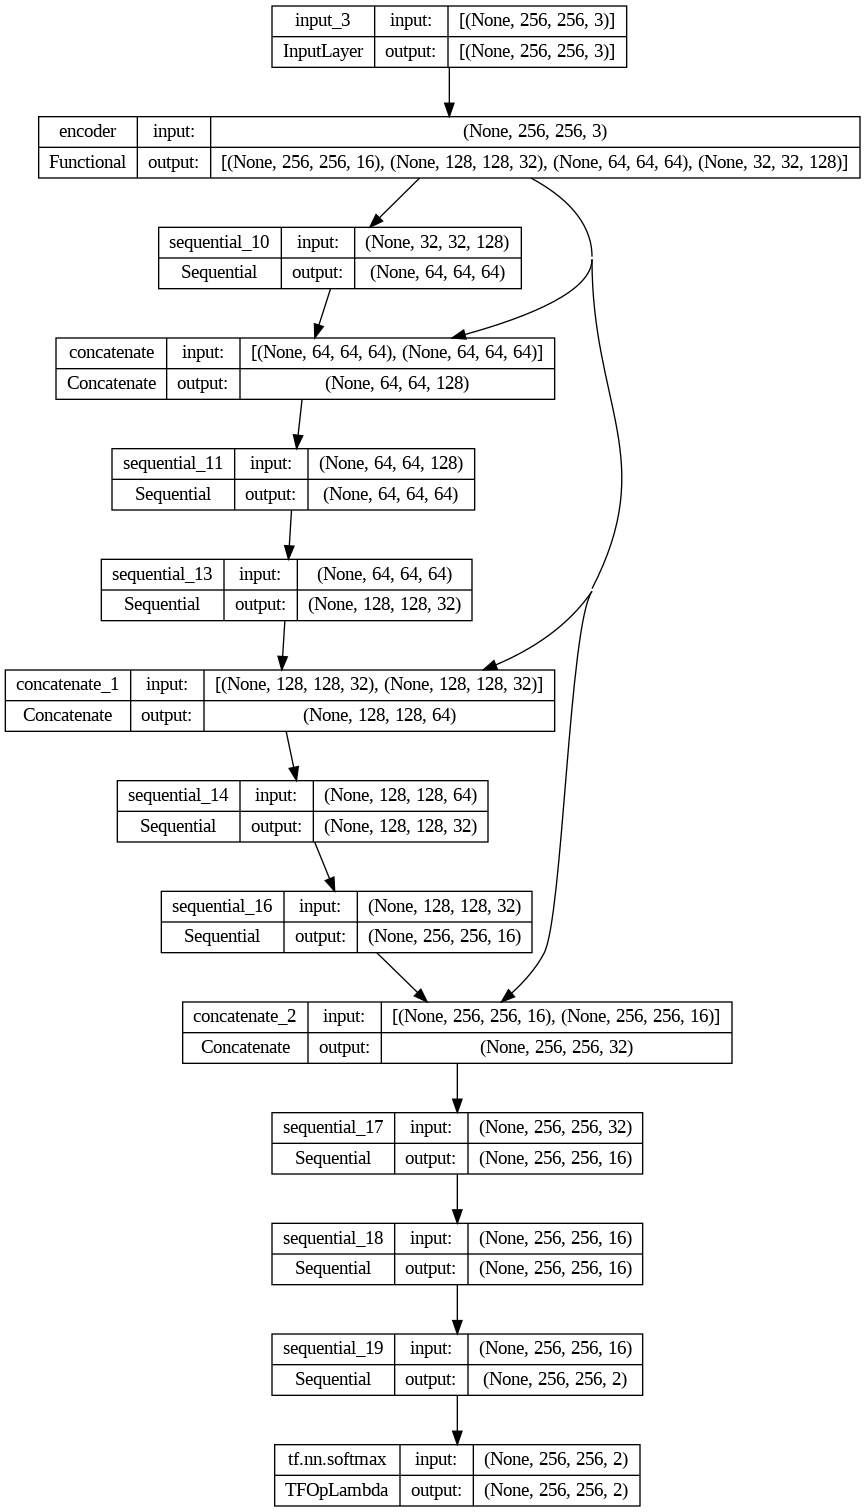

In [43]:
tf.keras.utils.plot_model(my_model, show_shapes=True)

In [44]:
### creating a folder in current directory for saving model weights 

folder_path ='./mymodel_checkpoints/'

if os.path.exists(folder_path) == True:
    None
else:
    os.makedirs(folder_path)

In [33]:
## creating checkpoint variable

early = tf.keras.callbacks.EarlyStopping(patience=10, monitor='mean-IoU', min_delta=0.0001)

checkpoint_path = './mymodel_checkpoints/train_weight_epoch_{epoch:02d}.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                mode='max',
                                                monitor='mean-IoU')

callbacks_list = [early,checkpoint]

In [ ]:
## fitting the model

mymodel_history = my_model.fit(batches_train, epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH,callbacks=callbacks_list, verbose=1)
## stopped due to early stopping criteria

Epoch 1/10
50/50 [==============================] - 1328s 26s/step - loss: 0.3196 - mean-IoU: 0.6693 - binary_accuracy: 0.9975
Epoch 2/10
50/50 [==============================] - 1285s 26s/step - loss: 0.1899 - mean-IoU: 0.6876 - binary_accuracy: 0.9982
Epoch 3/10
50/50 [==============================] - 1319s 26s/step - loss: 0.1084 - mean-IoU: 0.7164 - binary_accuracy: 0.9986
Epoch 4/10
50/50 [==============================] - 1291s 26s/step - loss: 0.0656 - mean-IoU: 0.7178 - binary_accuracy: 0.9986


In [ ]:
my_model.evaluate(batches_val, steps=20, verbose=1)      ## checking validation IOU

20/20 [==============================] - 219s 11s/step - loss: 0.0549 - mean-IoU: 0.6422 - binary_accuracy: 0.9980


[0.0548766627907753, 0.6421658992767334, 0.9979756474494934]

In [ ]:
my_model.load_weights('./mymodel_checkpoints/train_weight_epoch_04.hdf5')

In [ ]:
# ### retraining model for better performance 

mymodel_history = my_model.fit(batches_train, epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH,callbacks=callbacks_list, verbose=1)

Epoch 1/10
50/50 [==============================] - 1358s 27s/step - loss: 0.0355 - mean-IoU: 0.6736 - binary_accuracy: 0.9985
Epoch 2/10
50/50 [==============================] - 1320s 26s/step - loss: 0.0177 - mean-IoU: 0.7074 - binary_accuracy: 0.9986
Epoch 3/10
50/50 [==============================] - 1349s 27s/step - loss: 0.0109 - mean-IoU: 0.7109 - binary_accuracy: 0.9987
Epoch 4/10
50/50 [==============================] - 1279s 26s/step - loss: 0.0093 - mean-IoU: 0.7226 - binary_accuracy: 0.9985
Epoch 5/10
50/50 [==============================] - 1256s 25s/step - loss: 0.0078 - mean-IoU: 0.7170 - binary_accuracy: 0.9985
Epoch 6/10
50/50 [==============================] - 1290s 26s/step - loss: 0.0065 - mean-IoU: 0.7219 - binary_accuracy: 0.9986
Epoch 7/10
50/50 [==============================] - 1302s 26s/step - loss: 0.0062 - mean-IoU: 0.7236 - binary_accuracy: 0.9985
Epoch 8/10
50/50 [==============================] - 1263s 25s/step - loss: 0.0056 - mean-IoU: 0.7321 - binary_a

In [47]:
my_model.evaluate(batches_val, steps=50, verbose=1)      ## checking validation IOU

50/50 [==============================] - 563s 11s/step - loss: 0.0060 - mean-IoU: 0.7416 - binary_accuracy: 0.9985


[0.005964762065559626, 0.7415750026702881, 0.9984689950942993]

In [56]:
my_model.load_weights('./mymodel_checkpoints/train_weight_epoch_08.hdf5')

In [57]:
mymodel_history = my_model.fit(batches_train, epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH,callbacks=callbacks_list, verbose=1)

Epoch 1/5
50/50 [==============================] - 1230s 24s/step - loss: 0.0050 - mean-IoU: 0.7428 - binary_accuracy: 0.9988
Epoch 2/5
50/50 [==============================] - 1168s 23s/step - loss: 0.0049 - mean-IoU: 0.7421 - binary_accuracy: 0.9987
Epoch 3/5
50/50 [==============================] - 1132s 23s/step - loss: 0.0044 - mean-IoU: 0.7392 - binary_accuracy: 0.9988
Epoch 4/5
50/50 [==============================] - 1137s 23s/step - loss: 0.0049 - mean-IoU: 0.7319 - binary_accuracy: 0.9986
Epoch 5/5
50/50 [==============================] - 1178s 24s/step - loss: 0.0040 - mean-IoU: 0.7312 - binary_accuracy: 0.9988


In [58]:
my_model.evaluate(batches_val, steps=30, verbose=1)      ## checking validation IOU

30/30 [==============================] - 293s 10s/step - loss: 0.0047 - mean-IoU: 0.7143 - binary_accuracy: 0.9986


[0.00472376961261034, 0.714301586151123, 0.9986395239830017]

In [67]:
my_model.load_weights('./mymodel_checkpoints/train_weight_epoch_02.hdf5')

In [60]:
my_model.evaluate(batches_val, steps=50, verbose=1)      ## checking validation IOU

50/50 [==============================] - 471s 9s/step - loss: 0.0057 - mean-IoU: 0.7401 - binary_accuracy: 0.9985


[0.00565984845161438, 0.7400922179222107, 0.9984616041183472]

In [68]:
mymodel_history = my_model.fit(batches_train, epochs=8, steps_per_epoch=STEPS_PER_EPOCH,callbacks=callbacks_list, verbose=1)

Epoch 1/8
50/50 [==============================] - 1178s 23s/step - loss: 0.0047 - mean-IoU: 0.7478 - binary_accuracy: 0.9987
Epoch 2/8
50/50 [==============================] - 1148s 23s/step - loss: 0.0049 - mean-IoU: 0.7185 - binary_accuracy: 0.9986
Epoch 3/8
50/50 [==============================] - 1131s 23s/step - loss: 0.0042 - mean-IoU: 0.7362 - binary_accuracy: 0.9988
Epoch 4/8
50/50 [==============================] - 1145s 23s/step - loss: 0.0050 - mean-IoU: 0.7249 - binary_accuracy: 0.9985
Epoch 5/8
50/50 [==============================] - 1144s 23s/step - loss: 0.0041 - mean-IoU: 0.7507 - binary_accuracy: 0.9987
Epoch 6/8
50/50 [==============================] - 1138s 23s/step - loss: 0.0038 - mean-IoU: 0.7596 - binary_accuracy: 0.9988
Epoch 7/8
50/50 [==============================] - 1133s 23s/step - loss: 0.0037 - mean-IoU: 0.7751 - binary_accuracy: 0.9989
Epoch 8/8
50/50 [==============================] - 1177s 24s/step - loss: 0.0051 - mean-IoU: 0.7261 - binary_accuracy:

In [34]:
my_model.load_weights('./mymodel_checkpoints/train_weight_epoch_07.hdf5')

In [ ]:
mymodel_history = my_model.fit(batches_train, epochs=8, steps_per_epoch=STEPS_PER_EPOCH,callbacks=callbacks_list, verbose=1)

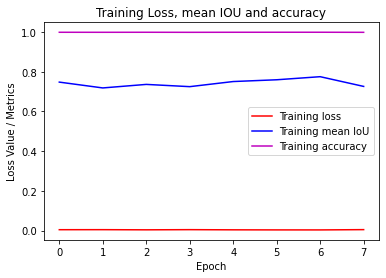

In [71]:
## plotting model loss and metrics per epoch metrics

loss = mymodel_history.history['loss']
mIoU = mymodel_history.history['mean-IoU']
acc = mymodel_history.history['binary_accuracy'] 
plt.figure()
plt.plot(mymodel_history.epoch, loss, 'r', label='Training loss')
plt.plot(mymodel_history.epoch, mIoU, 'b', label='Training mean IoU')
plt.plot(mymodel_history.epoch, acc, 'm', label='Training accuracy')
plt.title('Training Loss, mean IOU and accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss Value / Metrics')
plt.legend()
plt.show()


In [35]:
## checking model prediction

def mask_predict(image):
  image = np.expand_dims(image, axis=0)
  prediction = my_model.predict(image)[0].argmax(axis=-1)  
  return prediction

1/1 [==============================] - 0s 26ms/step


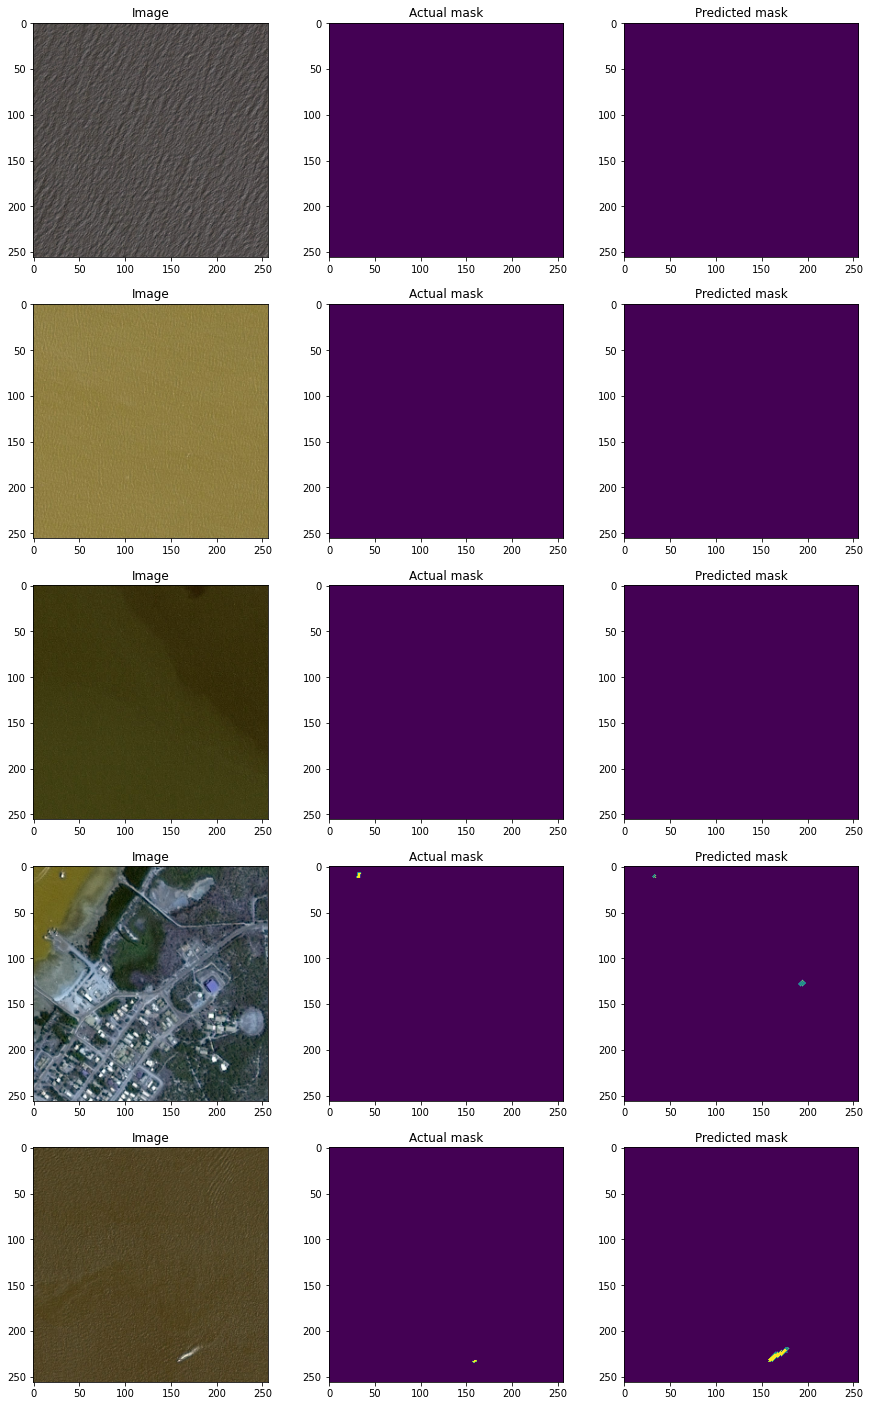

In [45]:
N = 5

fig,ax = plt.subplots(N, 3, figsize=(15, 5 * N))
i = 0
for image, mask in val_set.take(N):
    mask = mask.numpy().argmax(axis=-1)
    ax[i, 0].imshow(image)
    ax[i, 0].set_title('Image')
    ax[i, 1].imshow(mask)
    ax[i, 1].set_title('Actual mask')

    pred_mask = mask_predict(image)
    ax[i, 2].imshow(pred_mask)
    ax[i, 2].set_title('Predicted mask')
    i += 1

plt.show()

Submission file for test data 

In [37]:
submission_df = pd.read_csv("sample_submission.csv")
submission_df.head()

Unnamed: 0        ImageId EncodedPixels
0           0  0002756f7.jpg           1,2
1           1  0002756f7.jpg           1,2
2           2  0005d01c8.jpg           1,2
3           3  0005d01c8.jpg           1,2
4           4  0009a46e1.jpg           1,2

In [38]:
test_images_path = []

for folder in test_folders:
  for imageid in os.listdir(folder):
    test_images_path.append(os.path.join(folder,imageid))

test_images_path[-5:], len(test_images_path)

(['/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Test/untitled folder/test images 2/bca8cd4c0.jpg',
  '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Test/untitled folder/test images 2/02fad98a5.jpg',
  '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Test/untitled folder/test images 2/f9e43dddd.jpg',
  '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Test/untitled folder/test images 2/c2860973e.jpg',
  '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Test/untitled folder/test images 2/7291d56b8.jpg'],
 27466)

In [39]:
test_img_names = [imagepath[-13:] for imagepath in test_images_path]

In [ ]:
# test_dir = '/content/drive/.shortcut-targets-by-id/1u4jnkA6OOKvl_Vhcr7dQJ73VjMeX3PYq/Part 3/Test/untitled folder/test images 1/'

In [40]:
def model_prediction(test_path):
  image = cv2.imread(test_path)
  image = cv2.resize(image, image_shape, interpolation=cv2.INTER_AREA)
  image = image / 255.0
  pred_mask = mask_predict(image)
  encoded_pixels = mask_to_rle(pred_mask)
  if encoded_pixels == '':
    encoded_pixels = np.nan
  return encoded_pixels

In [46]:
list_encoded_pixels = []
i=0
for image in test_images_path:
  i += 1
  print(f'Image {i}')
  enc_pixel = model_prediction(image)
  list_encoded_pixels.append(enc_pixel)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step
Image 24968
1/1 [==============================] - 0s 24ms/step
Image 24969
1/1 [==============================] - 0s 26ms/step
Image 24970
1/1 [==============================] - 0s 24ms/step
Image 24971
1/1 [==============================] - 0s 25ms/step
Image 24972
1/1 [==============================] - 0s 26ms/step
Image 24973
1/1 [==============================] - 0s 25ms/step
Image 24974
1/1 [==============================] - 0s 25ms/step
Image 24975
1/1 [==============================] - 0s 26ms/step
Image 24976
1/1 [==============================] - 0s 24ms/step
Image 24977
1/1 [==============================] - 0s 24ms/step
Image 24978
1/1 [==============================] - 0s 24ms/step
Image 24979
1/1 [==============================] - 0s 26ms/step
Image 24980
1/1 [==============================] - 0s 25ms/step
Image 24981
1/1 [==============================] - 0s 25ms/step
I

In [47]:
list_encoded_pixels

[nan,
 '39772 3 39778 3 39784 3 40540 3 40546 3 40552 3 41308 3 41314 3 41320 3 42067 3 42073 3 42079 9 42091 3 42835 3 42841 3 42847 9 42859 3 43603 3 43609 3 43615 9 43627 3 44368 3 44374 27 44404 3 45136 3 45142 27 45172 3 45904 3 45910 27 45940 3 46663 3 46669 39 46711 3 47431 3 47437 39 47479 3 48199 3 48205 39 48247 3 48964 3 48970 45 49018 3 49732 3 49738 45 49786 3 50500 3 50506 45 50554 3 51265 3 51271 45 51319 3 51325 3 52033 3 52039 45 52087 3 52093 3 52801 3 52807 45 52855 3 52861 3 53572 51 53626 3 54340 51 54394 3 55108 51 55162 3 55873 3 55879 51 55933 3 56641 3 56647 51 56701 3 57409 3 57415 51 57469 3 58174 3 58180 51 58234 3 58240 3 58942 3 58948 51 59002 3 59008 3 59710 3 59716 51 59770 3 59776 3 60475 3 60481 57 60541 3 60547 3 61243 3 61249 57 61309 3 61315 3 62011 3 62017 57 62077 3 62083 3 62776 3 62782 57 62842 3 62848 3 62854 3 63544 3 63550 57 63610 3 63616 3 63622 3 64312 3 64318 57 64378 3 64384 3 64390 3 65083 3 65089 51 65143 3 65149 3 65155 3 65851 3 6585

In [48]:
new_submission_df = pd.DataFrame({'ImageId':test_img_names, 'EncodedPixels':list_encoded_pixels})

new_submission_df.head()

ImageId                                      EncodedPixels
0  ccac5886c.jpg                                                NaN
1  d2340f526.jpg  39772 3 39778 3 39784 3 40540 3 40546 3 40552 ...
2  4a45216d3.jpg  564562 3 564568 3 565330 3 565336 3 566098 3 5...
3  534f097d7.jpg                                                NaN
4  d5e80bff7.jpg  79027 3 79795 3 80563 3 81322 3 81328 3 81334 ...

In [49]:
len(new_submission_df)

27466

In [52]:
new_submission_df.to_csv('final_submission.csv')

**10) IOU of validation set**

(The test data has no labels/ EncodedPixels to perform IOU)

In [70]:
my_model.evaluate(batches_val, steps=50, verbose=1)      ## checking validation IOU

50/50 [==============================] - 418s 8s/step - loss: 0.0053 - mean-IoU: 0.7578 - binary_accuracy: 0.9983


[0.005326168145984411, 0.7577943205833435, 0.9983018636703491]